In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_cardio = pd.read_csv('./data/cardio_train.csv', sep = ';')
df_cardio = df_cardio.set_index('id')


In [3]:
df_cardio['ap_lo'].min(), df_cardio['ap_hi'].min(), df_cardio['ap_lo'].max(), df_cardio['ap_hi'].max()

(-70, -150, 11000, 16020)

## Metrics overview
- ap_hi is Systolic blood pressure. Normal 120 or little below, max 200, considered low under 90. Hard to find realistic lowest viable value, maybe 60 ? In some extreme case some humans can survive up to 300.
- ap_lo Diastolic blood pressure Normal 80,  Max 140, considered low under 60 unrealistic under 40 ?
- height 251 max

In [4]:
df_cardio['age_years'] = df_cardio['age'].apply(lambda x : x/365)
df_cardio['age_years'].min(), df_cardio['age_years'].max()
#Age range seems all good

(29.583561643835615, 64.96712328767123)

In [5]:
data_filters = ['ap_hi > 300 or ap_hi < 60 ', 'height < 80', 'weight < 30', 'ap_lo > 200 or ap_lo < 40']
for condition in data_filters:
    df_cardio.drop(df_cardio.query(condition).index, axis=0, inplace = True)

df_cardio.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 68749 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          68749 non-null  int64  
 1   gender       68749 non-null  int64  
 2   height       68749 non-null  int64  
 3   weight       68749 non-null  float64
 4   ap_hi        68749 non-null  int64  
 5   ap_lo        68749 non-null  int64  
 6   cholesterol  68749 non-null  int64  
 7   gluc         68749 non-null  int64  
 8   smoke        68749 non-null  int64  
 9   alco         68749 non-null  int64  
 10  active       68749 non-null  int64  
 11  cardio       68749 non-null  int64  
 12  age_years    68749 non-null  float64
dtypes: float64(2), int64(11)
memory usage: 7.3 MB


### a)

In [6]:
cardio_count = df_cardio['cardio'].value_counts()
print(f"In the dataset, {cardio_count[1]} people suffer from an heart condition, and {cardio_count[0]} don't")


In the dataset, 34027 people suffer from an heart condition, and 34722 don't


### b)

<AxesSubplot:ylabel='cholesterol'>

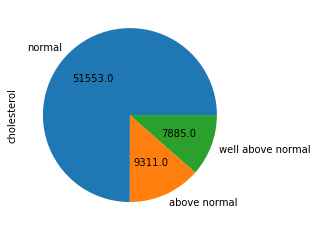

In [7]:
import numpy as np

labels = ['normal', 'above normal', 'well above normal']
chol_count = df_cardio['cholesterol'].value_counts()

def absolute_value(val): #https://stackoverflow.com/questions/41088236/how-to-have-actual-values-in-matplotlib-pie-chart-displayed
    a  = np.round(val/100.*chol_count.sum(), 0)
    return a


chol_count.plot.pie(labels = labels,  autopct=absolute_value)

<AxesSubplot:xlabel='age_years', ylabel='Count'>

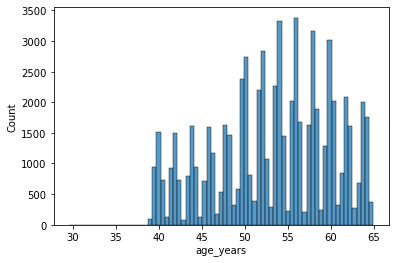

In [8]:
#Round age years
sns.histplot(x = df_cardio['age_years'])

([<matplotlib.patches.Wedge at 0x7f890131f4f0>,
 [Text(-1.058229258517367, 0.30025128878621643, 'non-smoker'),
  Text(1.058229286628917, -0.3002511897076411, 'smoker')],
 [Text(-0.577215959191291, 0.16377343024702715, '91%'),
  Text(0.5772159745248636, -0.16377337620416785, '9%')])

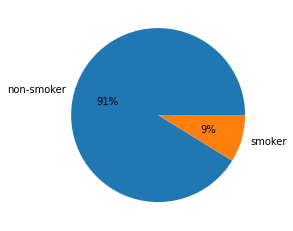

In [9]:
smoke = ['non-smoker', 'smoker']
plt.pie(df_cardio['smoke'].value_counts(), labels = smoke, autopct='%.0f%%')

## 2.1.0 BMI

In [10]:
#BMI = kg/m2
df_cardio['BMI'] = df_cardio.apply(lambda row : 1.3 * (row.weight / (row.height /100)**2.5), axis =1)#new BMI

In [11]:
df_cardio['BMI'].describe()

count    68749.000000
mean        27.928433
std          6.102628
min         10.695048
25%         24.129455
50%         26.652099
75%         30.705138
max        404.239164
Name: BMI, dtype: float64

In [12]:
df_cardio.drop(df_cardio.query('BMI > 50 or BMI <12').index, axis=0, inplace = True)
df_cardio.shape


(68458, 14)

In [13]:
#BMI = kg/m2
#bmi_intervals = {"underweight": (0,18.4), "normal" :(18.5,24.9), "over":(25,29.9), "obese":(30)}

def bmi_cat(bmi):
    if bmi <18.5:
        cat = 1
    elif 18.5 <= bmi < 25:
        cat = 2
    elif 25 <= bmi < 30:
        cat = 3
    elif 30 <= bmi < 35:
        cat = 4
    elif 35 <= bmi < 40:
        cat = 5
    else:
        cat = 6 
    return cat

df_cardio['BMI_cat'] = df_cardio.apply(lambda row : bmi_cat(row.BMI), axis = 1)
df_cardio

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,BMI,BMI_cat
id,,,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.391781,22.032402,2
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.419178,36.353881,5
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51.663014,23.791042,2
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.282192,28.710479,3
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47.873973,23.950792,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99992,21074,1,165,80.0,150,80,1,1,0,0,1,1,57.736986,29.738803,3
99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,52.712329,27.007460,3
99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52.235616,30.130402,4


/Users/leolassarade/miniconda3/envs/ML-ll/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BMI_cat', ylabel='count'>

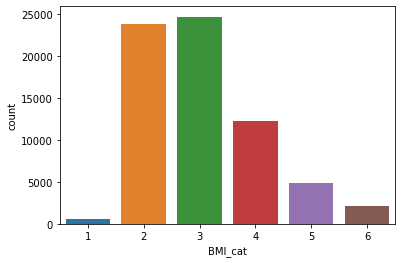

In [14]:
sns.countplot(df_cardio['BMI_cat'])

In [15]:
df_cardio.query('BMI_cat == 6')

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,BMI,BMI_cat
id,,,,,,,,,,,,,,,
42,18291,1,155,105.0,120,80,3,1,0,0,1,1,50.112329,45.635562,6
61,18207,1,162,107.0,150,90,2,1,0,0,1,1,49.882192,41.642768,6
121,23204,1,151,92.0,130,90,1,1,0,0,0,1,63.572603,42.686329,6
291,22570,1,162,105.0,140,90,3,1,0,0,0,1,61.835616,40.864399,6
358,21059,1,154,98.0,140,90,2,1,0,0,1,0,57.695890,43.288010,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99140,18435,1,156,99.9,120,80,1,1,0,0,1,0,50.506849,42.726503,6
99354,14617,1,161,105.0,120,80,1,1,0,0,1,1,40.046575,41.501898,6
99399,18864,1,155,101.0,140,80,3,2,0,0,1,1,51.682192,43.897065,6


In [16]:
def blood_pressure_cat(syst, diast):
    if syst <120 and diast <80:
        cat = 1
    elif 120 <= syst <130 and diast <80:
        cat = 2
    elif 130<= syst <140 or 80 <= diast <90:
        cat = 3
    elif syst >=140 or diast >=90:
        cat = 4
    else:
        cat = 5
    return cat

<AxesSubplot:xlabel='BP_cat', ylabel='count'>

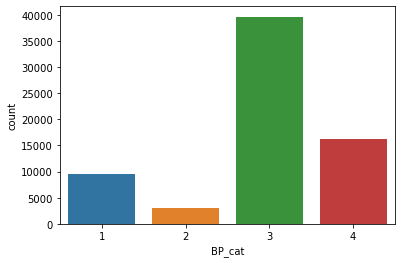

In [17]:
df_cardio['BP_cat'] = df_cardio.apply(lambda row : blood_pressure_cat(row.ap_hi, row.ap_lo), axis = 1)
sns.countplot(data = df_cardio, x= 'BP_cat')


Check against BMI category, gender, blood pressure cat

<AxesSubplot:xlabel='BMI_cat', ylabel='Heart_disease'>

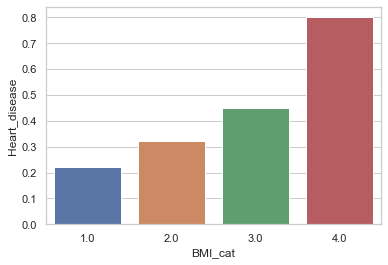

In [18]:
#condition = 'BP_cat == 1 and cardio ==1'
#fig, ax = plt.subplot(), plt.axes()

counts =[]
proportions = []

for i in range(1,5):
    count = len(df_cardio.query(f'BP_cat == {i} and cardio ==1'))
    proportion = count / len(df_cardio.query(f'BP_cat == {i}')) 
    counts.append(count)
    proportions.append(proportion)

df_bmi = pd.DataFrame([range(1,5), counts, proportions]).T
df_bmi.columns = ['BMI_cat', 'Count', 'Heart_disease']


sns.set_theme(style="whitegrid")
sns.barplot(x = df_bmi.BMI_cat,y = df_bmi.Heart_disease)

In [19]:
def categorical_feature_to_heart_desease_proportion(dataframe, feature, categorical_grades):
    counts =[]
    proportions = []

    for i in range(1,categorical_grades+1):
        count = len(dataframe.query(f'{feature} == {i} and cardio ==1'))
        proportion = count / len(dataframe.query(f'{feature} == {i}')) 
        counts.append(count)
        proportions.append(proportion)

    df = pd.DataFrame([range(1,categorical_grades+1), counts, proportions]).T
    df.columns = [f'{feature}', 'Count', 'Heart_disease']
    return df

category_to_observe = {'bmi' : ['BMI_cat', 6],
                       'blood_pressure' : ['BP_cat', 4],
                       'cholesterol' : ['cholesterol', 3],
                       'glucose' : ['gluc', 3],
                       }




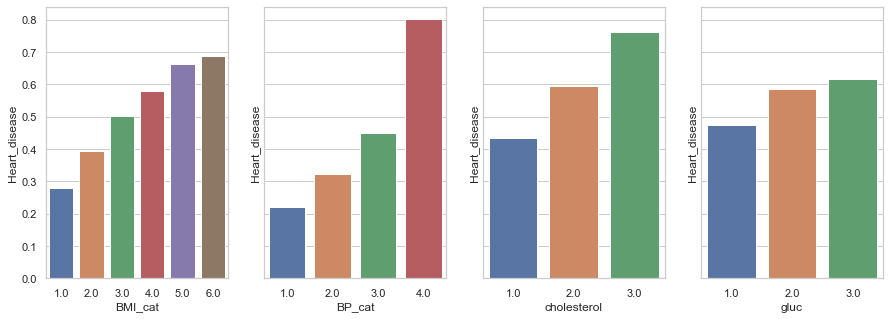

In [20]:
fig, axs = plt.subplots(1,len(category_to_observe), figsize = (15,5), sharey= True)

for i, value in enumerate(category_to_observe.values()):
    df = categorical_feature_to_heart_desease_proportion(df_cardio, value[0], value[1])
    fig = sns.barplot(x = df[value[0]],y = df.Heart_disease, ax = axs[i])



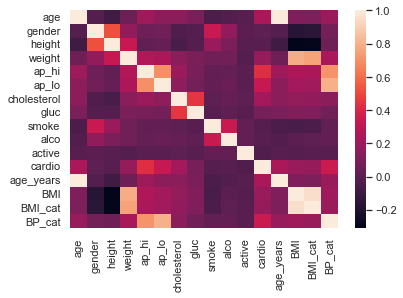

In [21]:
sns.heatmap(df_cardio.corr());

In [22]:
df_cardio_categorical_features = df_cardio.drop(['ap_hi', 'ap_lo', 'age_years', 'height', 'weight', 'BMI'], axis =1)
df_cardio_features = df_cardio.drop(['BMI_cat', 'BP_cat','height', 'weight', 'age'], axis =1)




#Round BMI, keep age years and round
print(df_cardio_features.head())
print(df_cardio_categorical_features.head())

    gender  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  active  cardio  \
id                                                                         
0        2    110     80            1     1      0     0       1       0   
1        1    140     90            3     1      0     0       1       1   
2        1    130     70            3     1      0     0       0       1   
3        2    150    100            1     1      0     0       1       1   
4        1    100     60            1     1      0     0       0       0   

    age_years        BMI  
id                        
0   50.391781  22.032402  
1   55.419178  36.353881  
2   51.663014  23.791042  
3   48.282192  28.710479  
4   47.873973  23.950792  
      age  gender  cholesterol  gluc  smoke  alco  active  cardio  BMI_cat  \
id                                                                           
0   18393       2            1     1      0     0       1       0        2   
1   20228       1            3     1      0 

In [23]:
df_cardio_categorical_features_encoded = pd.get_dummies(df_cardio_categorical_features, columns= ['BMI_cat', 'BP_cat', 'gender', 'cholesterol','gluc'])
df_cardio_features_encoded = pd.get_dummies(df_cardio_features, columns= ['gender', 'cholesterol'])
df_cardio_features_encoded = df_cardio_features_encoded.round(2)
df_cardio_features_encoded

,ap_hi,ap_lo,gluc,smoke,alco,active,cardio,age_years,BMI,gender_1,gender_2,cholesterol_1,cholesterol_2,cholesterol_3
id,,,,,,,,,,,,,,
0,110,80,1,0,0,1,0,50.39,22.03,0,1,1,0,0
1,140,90,1,0,0,1,1,55.42,36.35,1,0,0,0,1
2,130,70,1,0,0,0,1,51.66,23.79,1,0,0,0,1
3,150,100,1,0,0,1,1,48.28,28.71,0,1,1,0,0
4,100,60,1,0,0,0,0,47.87,23.95,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99992,150,80,1,0,0,1,1,57.74,29.74,1,0,1,0,0
99993,120,80,1,1,0,1,0,52.71,27.01,0,1,1,0,0
99996,180,90,1,0,1,0,1,52.24,30.13,0,1,0,0,1


In [24]:
df_cardio_categorical_features_encoded.head()

,age,smoke,alco,active,cardio,BMI_cat_1,BMI_cat_2,BMI_cat_3,BMI_cat_4,BMI_cat_5,...,BP_cat_3,BP_cat_4,gender_1,gender_2,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3
id,,,,,,,,,,,,,,,,,,,,,
0,18393,0,0,1,0,0,1,0,0,0,...,1,0,0,1,1,0,0,1,0,0
1,20228,0,0,1,1,0,0,0,0,1,...,0,1,1,0,0,0,1,1,0,0
2,18857,0,0,0,1,0,1,0,0,0,...,1,0,1,0,0,0,1,1,0,0
3,17623,0,0,1,1,0,0,1,0,0,...,0,1,0,1,1,0,0,1,0,0
4,17474,0,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0


In [25]:
from sklearn.model_selection import train_test_split

X_1, y_1 = df_cardio_features_encoded.drop('cardio', axis =1), df_cardio_features_encoded['cardio']
X_2, y_2 = df_cardio_categorical_features_encoded.drop('cardio', axis =1), df_cardio_categorical_features_encoded['cardio']

X1_train, X1_test, y1_train, y1_test = train_test_split(X_1,y_1, test_size= 0.2, random_state= 42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X_2,y_2, test_size= 0.2, random_state= 42)

X1_train, X1_val, y1_train, y1_val = train_test_split(X1_train,y1_train, test_size= 0.3, random_state= 42)
X2_train, X2_val, y2_train, y2_val = train_test_split(X2_train,y2_train, test_size= 0.3, random_state= 42)

X1_train.shape, X1_val.shape, y1_train.shape, y1_val.shape, X1_test.shape, y1_test.shape



((38336, 13), (16430, 13), (38336,), (16430,), (13692, 13), (13692,))

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans



pipe_KNN = Pipeline([("scaler", StandardScaler()), ("knn", KNeighborsClassifier())])
pipeline_logistic = Pipeline([("scaler", StandardScaler()), ("logistic", LogisticRegression(solver = "saga", penalty = "elasticnet", multi_class="ovr", max_iter = 10000))])
pipe_SVM = Pipeline([("scaler", StandardScaler()), ("km", KMeans())])

param_grid_KNN = {"knn__n_neighbors" : list(range(40,80))}
param_grid_logistic = {"logistic__l1_ratio": np.linspace(0,1, 20)}
param_grid_rf = {"n_estimators" : [50, 100, 150, 200, 300],
             "criterion" : ["gini", "entropy"],
             "max_features": ["auto", "sqrt", "log2"]
}
param_grid_SVM ={"km__n_clusters": [2],
                 "km__n_init": [10,20,30] }

classifier_KNN = GridSearchCV(estimator= pipe_KNN, param_grid = param_grid_KNN, cv = 5, scoring = "accuracy", verbose = 1)
classifier_logistic = GridSearchCV(estimator= pipeline_logistic, param_grid= param_grid_logistic, cv = 5, scoring = "accuracy", verbose = 1)
classifier_RF = GridSearchCV(RandomForestClassifier(), param_grid= param_grid_rf, cv = 4, verbose =1, scoring = "recall")
classifier_SVM = GridSearchCV(estimator= pipe_SVM, param_grid= param_grid_SVM, verbose =1)





In [29]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


models = (classifier_SVM, classifier_KNN, classifier_logistic, classifier_RF)

cms = []
for model in models:
    model.fit(X1_train, y1_train)
    print(f" Best params or df 1: {model.best_params_}")
    y_pred_tned_1 = model.predict(X1_val)
    print(classification_report(y1_val, y_pred_tned_1))
    cms.append(confusion_matrix(y1_val, y_pred_tned_1))



    


Fitting 5 folds for each of 3 candidates, totalling 15 fits
 Best params or df 1: {'km__n_clusters': 2, 'km__n_init': 10}
              precision    recall  f1-score   support

           0       0.51      0.66      0.57      8303
           1       0.50      0.35      0.41      8127

    accuracy                           0.51     16430
   macro avg       0.50      0.50      0.49     16430
weighted avg       0.50      0.51      0.49     16430

Fitting 5 folds for each of 40 candidates, totalling 200 fits
 Best params or df 1: {'knn__n_neighbors': 55}
              precision    recall  f1-score   support

           0       0.71      0.77      0.74      8303
           1       0.74      0.68      0.71      8127

    accuracy                           0.72     16430
   macro avg       0.73      0.72      0.72     16430
weighted avg       0.73      0.72      0.72     16430

Fitting 5 folds for each of 20 candidates, totalling 100 fits
 Best params or df 1: {'logistic__l1_ratio': 0.0}
   

First attemps on kmeans n_neighbors parameter gave 19 which was the highest value given in my parameters CV, I have had to change the range in order to look if a better figure was available

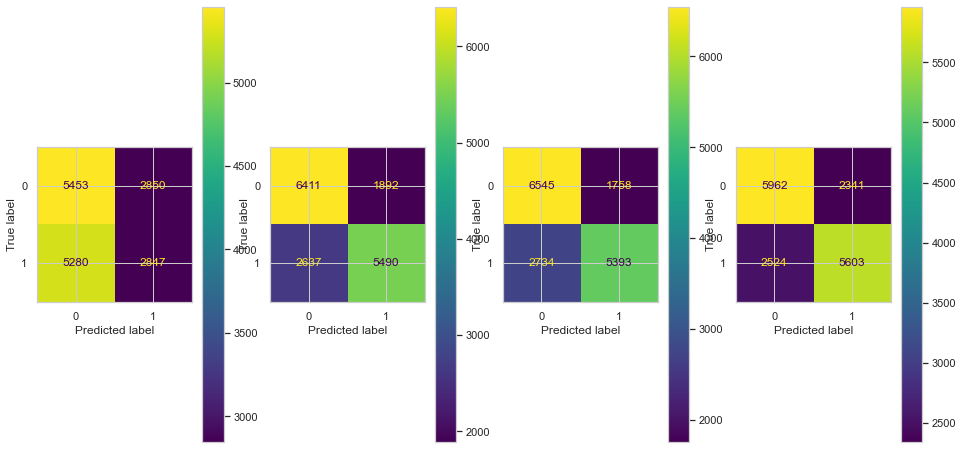

In [30]:
fig, axs = plt.subplots(1,4, figsize =(16,8))

for i, cm in enumerate(cms) :
    ConfusionMatrixDisplay(cm).plot(ax = axs[i])
    axs[i].set(title ="")
    




In [31]:
models = (classifier_SVM, classifier_KNN, classifier_logistic, classifier_RF)
cms = []
for model in models:
    model.fit(X2_train, y2_train)
    print(f" Best params or df 2: {model.best_params_}")
    y_pred_tned_2 = model.predict(X2_val)
    cms.append(confusion_matrix(y2_val, y_pred_tned_2))


    


Fitting 5 folds for each of 3 candidates, totalling 15 fits
 Best params or df 2: {'km__n_clusters': 2, 'km__n_init': 10}
Fitting 5 folds for each of 40 candidates, totalling 200 fits
 Best params or df 2: {'knn__n_neighbors': 72}
Fitting 5 folds for each of 20 candidates, totalling 100 fits
 Best params or df 2: {'logistic__l1_ratio': 0.3157894736842105}
Fitting 4 folds for each of 30 candidates, totalling 120 fits
 Best params or df 2: {'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 150}


              precision    recall  f1-score   support

           0       0.62      0.63      0.62      8303
           1       0.61      0.60      0.61      8127

    accuracy                           0.62     16430
   macro avg       0.62      0.62      0.62     16430
weighted avg       0.62      0.62      0.62     16430

              precision    recall  f1-score   support

           0       0.62      0.63      0.62      8303
           1       0.61      0.60      0.61      8127

    accuracy                           0.62     16430
   macro avg       0.62      0.62      0.62     16430
weighted avg       0.62      0.62      0.62     16430

              precision    recall  f1-score   support

           0       0.62      0.63      0.62      8303
           1       0.61      0.60      0.61      8127

    accuracy                           0.62     16430
   macro avg       0.62      0.62      0.62     16430
weighted avg       0.62      0.62      0.62     16430

              preci

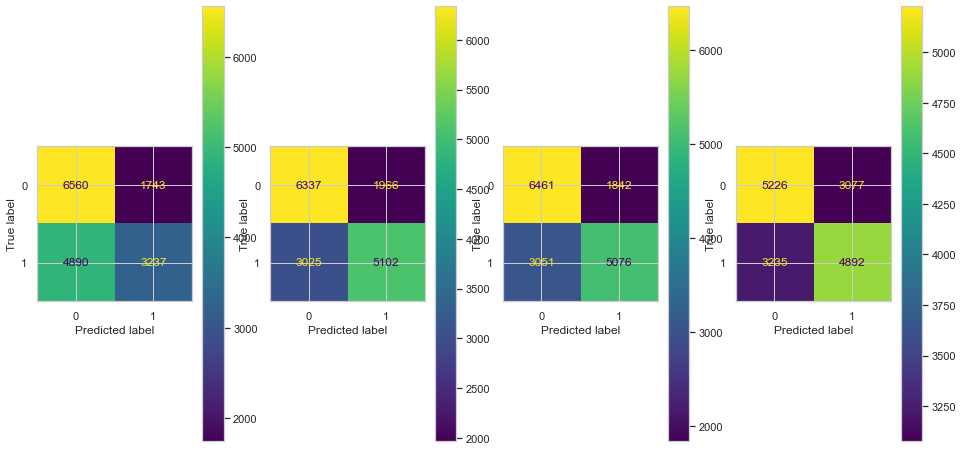

In [32]:
for model in models:
        print(classification_report(y2_val, y_pred_tned_2))


fig, axs = plt.subplots(1,4, figsize =(16,8))

for i, cm in enumerate(cms) :
    ConfusionMatrixDisplay(cm).plot(ax = axs[i])    


## From this exploration, best model for me was Knn, so I tune it further.

In [34]:
classifier_KNN.best_params_

{'knn__n_neighbors': 72}

In [40]:
from sklearn.preprocessing import MinMaxScaler


pipe_KNN_std = Pipeline([("scaler", StandardScaler()), ("knn", KNeighborsClassifier())])
pipe_KNN_mmax = Pipeline([("scaler", MinMaxScaler()), ("knn", KNeighborsClassifier())])




param_grid_KNN_further = {"knn__n_neighbors" : list(range(40,80)),
                          "knn__weights": ['uniform', 'distance'],
                          "knn__algorithm": ['ball_tree', 'kd_tree', 'brute']}


classifier_KNN_1_1 = GridSearchCV(estimator= pipe_KNN_mmax, param_grid = param_grid_KNN_further, cv = 5, scoring = "accuracy", verbose = 1)
classifier_KNN_1_2 = GridSearchCV(estimator= pipe_KNN_std, param_grid = param_grid_KNN_further, cv = 5, scoring = "accuracy", verbose = 1)

models = (classifier_KNN_1_1, classifier_KNN_1_2)




In [41]:
def fit_and_predict(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    print(f" Best params for dataset: {model.best_params_}")
    y_pred_tned = model.predict(X_val)
    print(classification_report(y_val, y_pred_tned))
    return(confusion_matrix(y_val, y_pred_tned))

In [42]:
cms = []
for model in models:
    cms.append(fit_and_predict(model,X1_train, y1_train, X1_test, y1_test))

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


KeyboardInterrupt: 

In [50]:

"""
import random as rnd

random_indexes = []

for i in range(100):    
    idx = rnd.choice(range(0,100000))
    if idx.isin(X_1.index):
"""
rv_df = X_1.sample(100)
rv_df


,ap_hi,ap_lo,gluc,smoke,alco,active,age_years,BMI,gender_1,gender_2,cholesterol_1,cholesterol_2,cholesterol_3
id,,,,,,,,,,,,,
6885,110,70,1,0,0,1,48.15,22.43,0,1,0,1,0
49725,120,80,1,0,0,1,46.64,27.26,0,1,1,0,0
97705,150,80,3,0,0,0,64.34,20.74,1,0,0,0,1
22835,110,70,1,0,0,1,44.49,25.00,1,0,1,0,0
27152,120,80,1,0,0,0,47.65,23.05,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8271,120,90,1,1,0,1,55.72,20.77,0,1,0,1,0
36403,100,65,2,0,0,1,43.80,31.23,1,0,1,0,0
9572,110,70,1,0,0,0,40.47,21.89,1,0,1,0,0
